In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.layers import Dense,Input

In [ ]:
# Define the Input Layer
input_layer = Input(shape=(784,))

In [ ]:
# Encoding Layer
encoder_layer = Dense(64, activation='relu')(input_layer) #bottleneck

In [ ]:
# Decode Layer
decoder_layer = Dense(784, activation='sigmoid')(encoder_layer)

In [ ]:
# Create the AutoEncoder Model
autoencoder = Model(input_layer, decoder_layer)

In [ ]:
encoder_model = Model(input_layer, encoder_layer)

In [ ]:
# 64 neuron input layer for the Decoder
encoded_input = Input(shape=(64,))

# Retrieve the last layer of the autoencoder model
decoded_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = Model(encoded_input, decoded_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1357 - val_loss: 0.0911
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - val_loss: 0.0777
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0771 - val_loss: 0.0751
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - val_loss: 0.0743
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0748 - val_loss: 0.0740
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0744 - val_loss: 0.0736
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0742 - val_loss: 0.0733
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - val_loss: 0.0733
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0739 - val_loss: 0.0732
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.073

In [ ]:
# We will use the X_test and the encoder model to Encode the images
encoded_imgs = encoder_model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

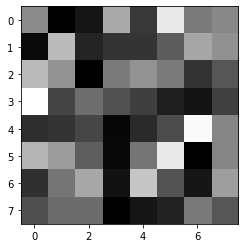

In [ ]:
plt.imshow(encoded_imgs[1].reshape(8,8), cmap='gray')

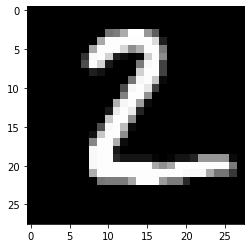

In [ ]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray')

In [ ]:
y_test[1]

2

In [ ]:
encoded_imgs[0].shape

(64,)

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs) # Use the decoder model to decode the encoded images

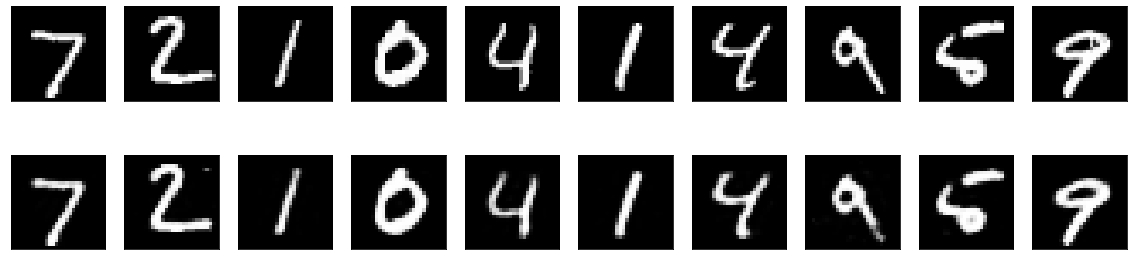

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Layers
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________
